                     NLP test document
                     


17464789/17464789 [==============================] - 5s 0us/step


Epoch 1/5


196/196 [==============================] - 42s 202ms/step - loss: 0.4898 - accuracy: 0.7520 - val_loss: 0.3524 - val_accuracy: 0.8539
Epoch 2/5
196/196 [==============================] - 44s 223ms/step - loss: 0.2511 - accuracy: 0.8999 - val_loss: 0.3033 - val_accuracy: 0.8701
Epoch 3/5
196/196 [==============================] - 44s 225ms/step - loss: 0.1847 - accuracy: 0.9319 - val_loss: 0.3238 - val_accuracy: 0.8598
Epoch 4/5
196/196 [==============================] - 43s 220ms/step - loss: 0.1406 - accuracy: 0.9501 - val_loss: 0.3711 - val_accuracy: 0.8632
Epoch 5/5
782/782 [==============================] - 22s 29ms/step - loss: 0.3856 - accuracy: 0.8538
Test Accuracy: 0.8537999987602234


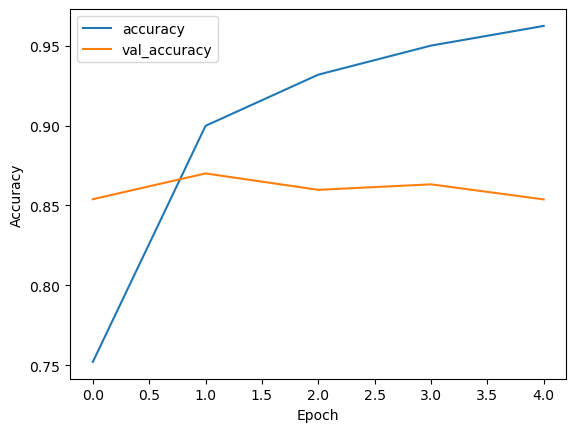

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load the IMDb movie reviews dataset
num_words = 10000  # Vocabulary size
max_len = 200      # Maximum length of input sequences
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences to a fixed length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Define the LSTM model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=64, input_length=max_len),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
